In [1]:
import pandas as pd

In [3]:
iris_df = pd.read_csv("Iris.csv", index_col= "Id")
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
iris_df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Handling data Normalization

## Min Max Normalization

In [35]:
min_length = iris_df.SepalLengthCm.min()
max_length = iris_df.SepalLengthCm.max()

normal_length = (iris_df.SepalLengthCm - min_length)/(max_length - min_length)

In [7]:
normal_length.describe()

count    150.000000
mean       0.428704
std        0.230018
min        0.000000
25%        0.222222
50%        0.416667
75%        0.583333
max        1.000000
Name: SepalLengthCm, dtype: float64

<Axes: ylabel='Density'>

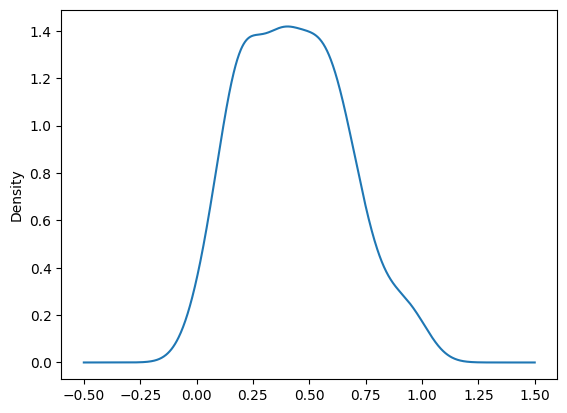

In [36]:
normal_length.plot.kde()

In [10]:
!pip install scikit-learn

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler(feature_range=(0,1))

In [18]:
norm_data = minmaxscaler.fit_transform(
    iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
)
                                       

In [19]:
norm_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [26]:
iris_norm_data = pd.DataFrame(norm_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [27]:
iris_norm_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## z-score Normalization / Standard Scaler

In [30]:
mean_length = iris_df.SepalLengthCm.mean()
std_length = iris_df.SepalLengthCm.std()

normal_length = (iris_df.SepalLengthCm - mean_length)/ std_length

In [31]:
round(normal_length.describe(),5)

count    150.00000
mean      -0.00000
std        1.00000
min       -1.86378
25%       -0.89767
50%       -0.05233
75%        0.67225
max        2.48370
Name: SepalLengthCm, dtype: float64

<Axes: ylabel='Density'>

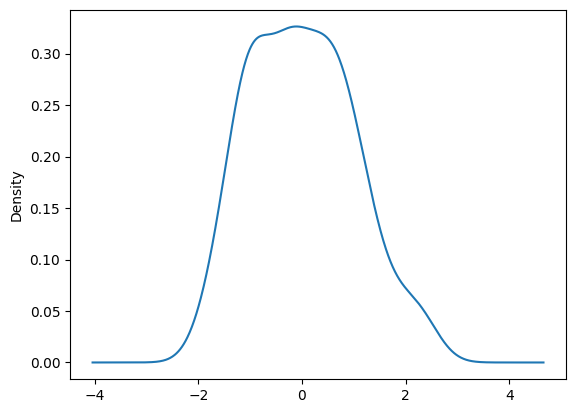

In [33]:
normal_length.plot.kde()

In [37]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

In [38]:
norm_data = st_scaler.fit_transform(
    iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
)

In [44]:
norm_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [46]:
pd.DataFrame(norm_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Log transformation

In [49]:
import numpy as np
data = np.arange(10,50000,50)

In [51]:
np.log(data).max()

np.float64(10.818977964239513)

In [54]:
transform_data = np.log(iris_df.drop("Species",axis = 1))
transform_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,1.629241,1.252763,0.336472,-1.609438
2,1.589235,1.098612,0.336472,-1.609438
3,1.547563,1.163151,0.262364,-1.609438
4,1.526056,1.131402,0.405465,-1.609438
5,1.609438,1.280934,0.336472,-1.609438


In [53]:
transform_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,1.755393,1.106442,1.175498,-0.176944
std,0.141189,0.142341,0.589493,0.991394
min,1.458615,0.693147,0.000000,-2.302585
25%,1.629241,1.029619,0.470004,-1.203973
50%,1.757858,1.098612,1.470110,0.262364
75%,1.856298,1.193922,1.629241,0.587787
max,2.066863,1.481605,1.931521,0.916291


## Power Transformation

In [60]:
pow_factor = 0.8
normal_length =np.sign(iris_df.SepalLengthCm) * np.power(np.abs(iris_df.SepalLengthCm),pow_factor)

In [61]:
normal_length.describe()

count    150.000000
mean       4.098643
std        0.464265
min        3.211994
25%        3.681766
50%        4.080773
75%        4.415135
max        5.225185
Name: SepalLengthCm, dtype: float64